# Obrada podataka po drzavama

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
curr = Path.cwd()
parent_directory = curr.parent.parent
file_path = parent_directory / "cleaned_data.csv"
print(file_path)

C:\Users\HB\Documents\lumen\git\data_cleanup\cleaned_data.csv


In [45]:
df = pd.read_csv(file_path)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     93962 non-null  int64  
 1   hotel_id                       93962 non-null  int64  
 2   datum_dolaska                  93962 non-null  object 
 3   datum_kreiranja_rezervacije    93962 non-null  object 
 4   datum_odjave                   93962 non-null  object 
 5   datum_otkazivanja_rezervacije  19548 non-null  object 
 6   broj_odraslih_gostiju          93962 non-null  int64  
 7   broj_djece_gostiju             93962 non-null  float64
 8   zemlja_gosta                   93962 non-null  object 
 9   kanal_prodaje_id               93962 non-null  int64  
 10  tip_sobe_id                    93962 non-null  int64  
 11  cijena_nocenja                 93962 non-null  float64
 12  status_rezervacije             93962 non-null 

In [49]:
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])

df['dani_izmedu_rezervacije_i_dolaska'] = (df['datum_dolaska'] - df['datum_kreiranja_rezervacije']).dt.days

In [50]:
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno,dani_izmedu_rezervacije_i_dolaska
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000,161
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000,21
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345,49
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897,397
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557,360


In [65]:
analysis = df.groupby('tip_sobe_id').agg({
    'cijena_nocenja': ['count', 'mean'], 
    'broj_nocenja': ['sum'], 
    'ukupno_placeno': ['sum'] 
})

analysis.columns = ['broj_rezervacija', 
                    'prosjecna_cijena_nocenja', 
                    'ukupan_broj_nocenja',
                    'ukupno_placeno']

analysis

,broj_rezervacija,prosjecna_cijena_nocenja,ukupan_broj_nocenja,ukupno_placeno
tip_sobe_id,,,,
0,829,198.229961,3781.0,7.890972e+05
1,66097,110.195153,206848.0,2.295746e+07
2,15965,139.650413,65581.0,8.963700e+06
3,5585,150.089254,25880.0,3.818402e+06
4,1765,208.491209,7137.0,1.520222e+06
5,2452,190.067564,8965.0,1.734188e+06
6,508,224.046449,1943.0,4.467930e+05
7,6,142.490204,7.0,1.015548e+03
8,755,109.165605,2478.0,2.682444e+05


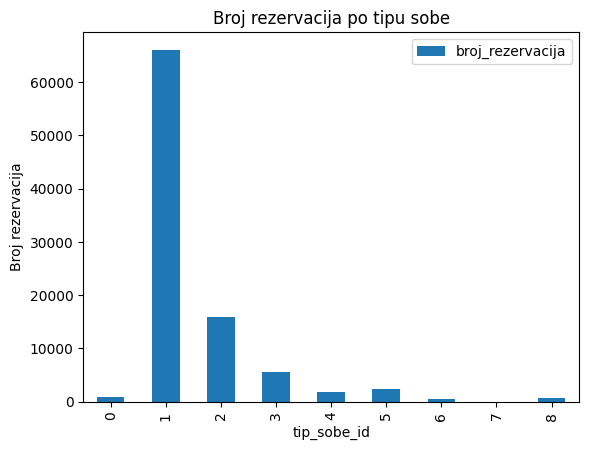

In [72]:
analysis.plot(kind='bar', y='broj_rezervacija', title='Broj rezervacija po tipu sobe')
plt.xlabel('tip_sobe_id')
plt.ylabel('Broj rezervacija')
plt.show()

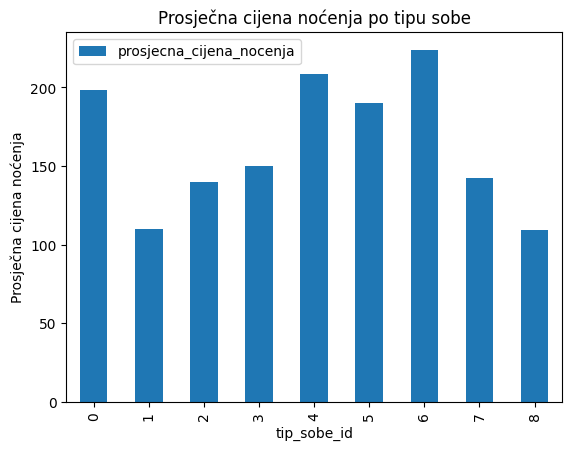

In [73]:
analysis.plot(kind='bar', y='prosjecna_cijena_nocenja', title='Prosječna cijena noćenja po tipu sobe')
plt.xlabel('tip_sobe_id')
plt.ylabel('Prosječna cijena noćenja')
plt.show()

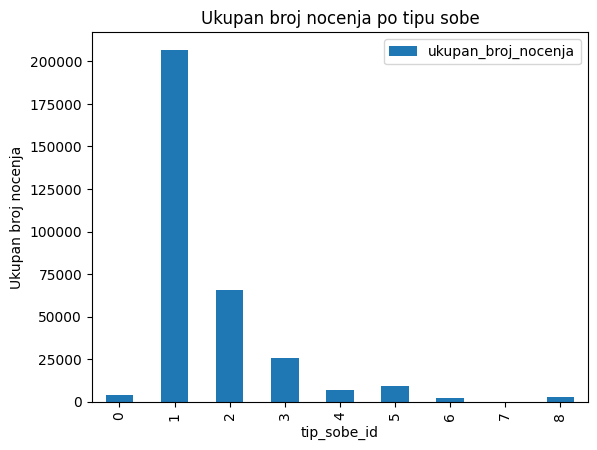

In [89]:
analysis.plot(kind='bar', y='ukupan_broj_nocenja', title='Ukupan broj nocenja po tipu sobe')
plt.xlabel('tip_sobe_id')
plt.ylabel('Ukupan broj nocenja')
plt.show()

## Cijena noćenja i broj rezervacija

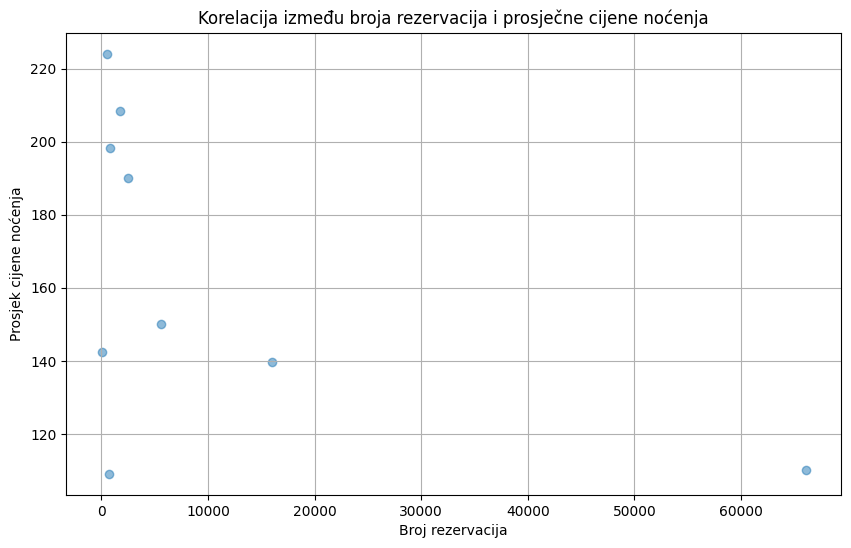

Pearsonov koeficijent korelacije između broja rezervacija i prosječne cijene noćenja: -0.5218563893029152


In [91]:
broj_rezervacija = analysis['broj_rezervacija']
prosjecna_cijena_nocenja = analysis['prosjecna_cijena_nocenja']

plt.figure(figsize=(10, 6))
plt.scatter(broj_rezervacija, prosjecna_cijena_nocenja, alpha=0.5)
plt.title('Korelacija između broja rezervacija i prosječne cijene noćenja')
plt.xlabel('Broj rezervacija')
plt.ylabel('Prosjek cijene noćenja')
plt.grid(True)
plt.show()

korelacija = analysis['broj_rezervacija'].corr(analysis['prosjecna_cijena_nocenja'])
print("Pearsonov koeficijent korelacije između broja rezervacija i prosječne cijene noćenja:", korelacija)

## Cijena noćenja i dani između rezervacije i dolaska

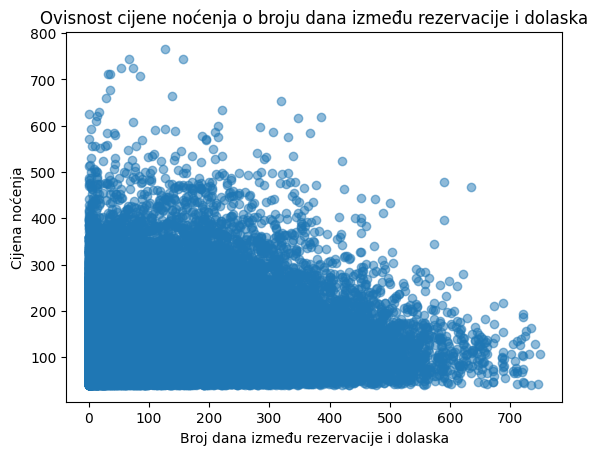

Korelacija između broja dana između rezervacije i dolaska i cijene noćenja: 0.058925250724223034


In [78]:
plt.scatter(df['dani_izmedu_rezervacije_i_dolaska'], df['cijena_nocenja'], alpha=0.5)
plt.title('Ovisnost cijene noćenja o broju dana između rezervacije i dolaska')
plt.xlabel('Broj dana između rezervacije i dolaska')
plt.ylabel('Cijena noćenja')
plt.show()

korelacija = df['dani_izmedu_rezervacije_i_dolaska'].corr(df['cijena_nocenja'])
print("Korelacija između broja dana između rezervacije i dolaska i cijene noćenja:", korelacija)

## Tip sobe 6 -> najveća prosječna cijena

In [79]:
# Izdvajanje podataka za tip sobe broj 6
tip_sobe_6 = analysis.loc[6]

# Ispis podataka
print("Analiza za tip sobe broj 6:")
print(tip_sobe_6)

Analiza za tip sobe broj 6:
broj_rezervacija               508.000000
prosjecna_cijena_nocenja       224.046449
ukupan_broj_nocenja           1943.000000
ukupno_placeno              446792.990199
Name: 6, dtype: float64


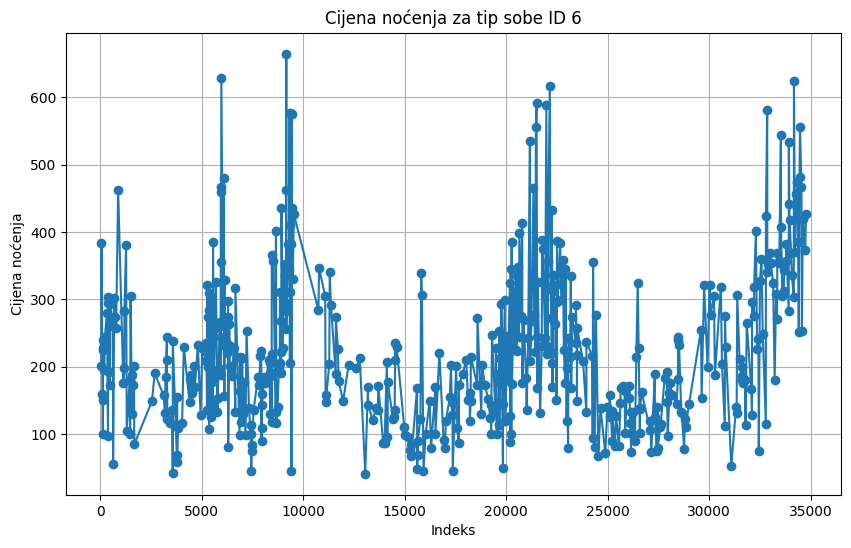

In [93]:
tip_sobe_6_df = df.loc[df['tip_sobe_id'] == 6]

plt.figure(figsize=(10, 6))
plt.plot(tip_sobe_6_df['cijena_nocenja'], marker='o', linestyle='-')
plt.title('Cijena noćenja za tip sobe ID 6')
plt.xlabel('Indeks')
plt.ylabel('Cijena noćenja')
plt.grid(True)
plt.show()

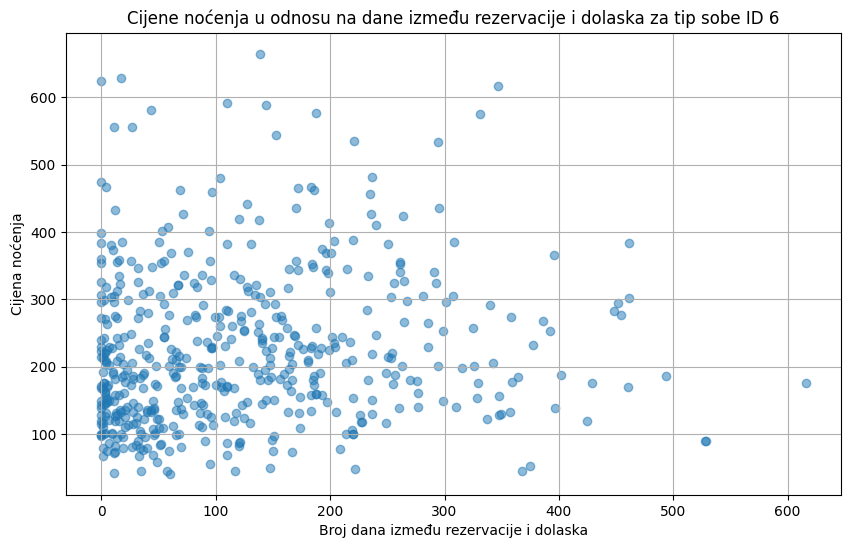

In [94]:
cijene_nocenja = tip_sobe_6_df['cijena_nocenja']
dani_izmedu_rezervacije_i_dolaska = tip_sobe_6_df['dani_izmedu_rezervacije_i_dolaska']

plt.figure(figsize=(10, 6))
plt.scatter(dani_izmedu_rezervacije_i_dolaska, cijene_nocenja, alpha=0.5)
plt.title('Cijene noćenja u odnosu na dane između rezervacije i dolaska za tip sobe ID 6')
plt.xlabel('Broj dana između rezervacije i dolaska')
plt.ylabel('Cijena noćenja')
plt.grid(True)
plt.show()

In [96]:
korelacija = cijene_nocenja.corr(dani_izmedu_rezervacije_i_dolaska)
print(korelacija)

0.11703943894240007


## Tip sobe 8 -> najmanja prosječna cijena

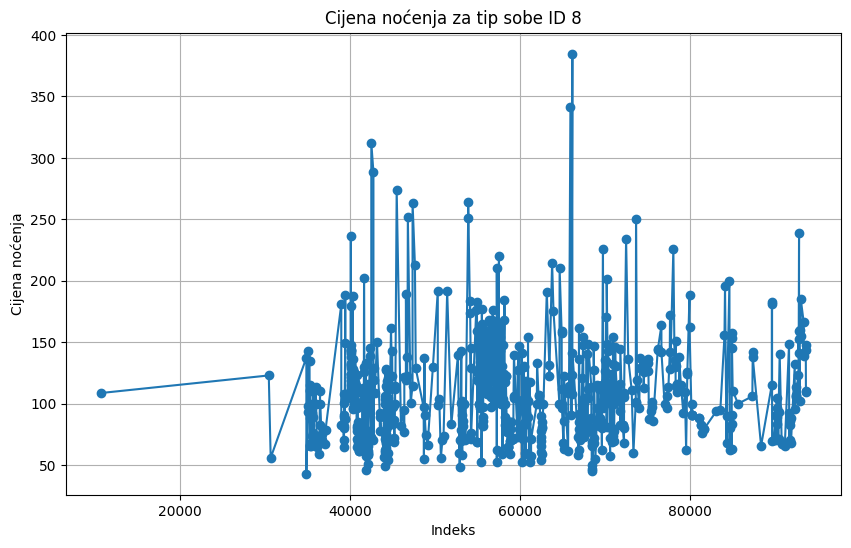

In [97]:
tip_sobe_8_df = df.loc[df['tip_sobe_id'] == 8]

plt.figure(figsize=(10, 6))
plt.plot(tip_sobe_8_df['cijena_nocenja'], marker='o', linestyle='-')
plt.title('Cijena noćenja za tip sobe ID 8')
plt.xlabel('Indeks')
plt.ylabel('Cijena noćenja')
plt.grid(True)
plt.show()

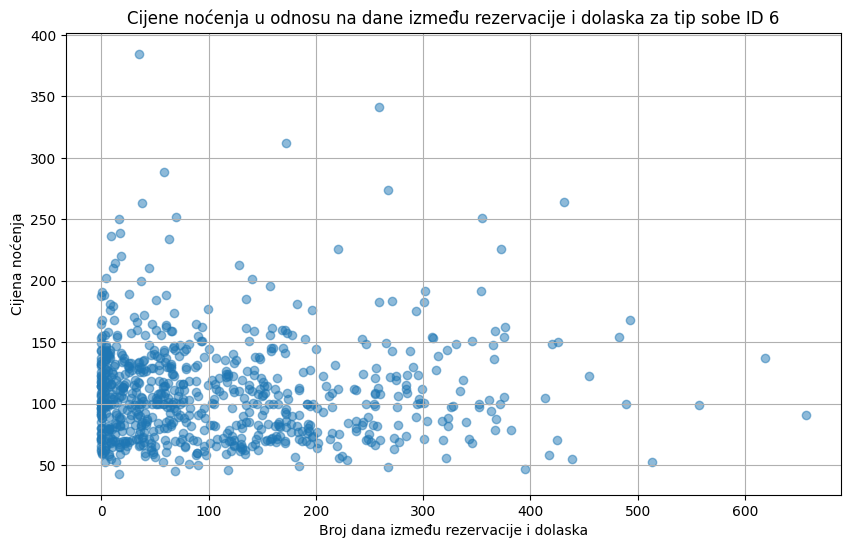

In [98]:
cijene_nocenja = tip_sobe_8_df['cijena_nocenja']
dani_izmedu_rezervacije_i_dolaska = tip_sobe_8_df['dani_izmedu_rezervacije_i_dolaska']

plt.figure(figsize=(10, 6))
plt.scatter(dani_izmedu_rezervacije_i_dolaska, cijene_nocenja, alpha=0.5)
plt.title('Cijene noćenja u odnosu na dane između rezervacije i dolaska za tip sobe ID 6')
plt.xlabel('Broj dana između rezervacije i dolaska')
plt.ylabel('Cijena noćenja')
plt.grid(True)
plt.show()

In [99]:
korelacija = cijene_nocenja.corr(dani_izmedu_rezervacije_i_dolaska)
print(korelacija)

0.011785489709013601
